## Riksdagen P1204  
version 2.2

Egenskap i Wikidata som bör bytas till GUID P8388
* [denna notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagen%20P1214.ipynb)
  * video [20201216 om denna notebook](https://youtu.be/BK7Cx0-s7Oo)
  * Phabricator [T235521](https://phabricator.wikimedia.org/T235521)
* [diskussion P1214](https://www.wikidata.org/wiki/Property_talk:P1214#Repair_needed) 
* egenskapsförslag [Wikidata:Property_proposal/Riksdagen_person_guid](https://www.wikidata.org/wiki/Wikidata:Property_proposal/Riksdagen_person_guid)
* [Riksdagensdata 1991 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=) 2020 jun
  * 2020-12-16 [2006 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)
  * 2025-01-13 [2512 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)
 
Odd how how Riksdagens Öppna data adds people.... looks like adding random not every Swedish MP...

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2025-01-15 14:00:01.078417


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista="
r = http.request('GET', url)
data = json.loads(r.data)


In [3]:
df = pd.DataFrame(pd.DataFrame(data["personlista"]["person"]))
df.sample(4)

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
390,d71a67c8-e776-46b0-9cd5-a9f82d7deff6,f5427ce8-9c75-433c-9434-7ddc7eddfea0,0208480761018,2343194,1962,man,Carlsson,Kent,"Carlsson,Kent",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/f5427ce8-9c75...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
320,20cb0b1a-b78a-4f4c-8de8-e0eb04675b1e,34c1367d-9a77-42f8-a015-277786da7a47,0958072321310,2343389,1968,man,Borg,Anders,"Borg,Anders",,M,,Tidigare ersättare,https://data.riksdagen.se/person/34c1367d-9a77...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'Fi', 'roll_kod': '...","{'uppgift': [{'kod': 'Officiell e-postadress',..."
193,3c80e33b-f23b-4e8f-8b38-a36054fe2235,df0762b8-b803-4ca7-81b6-7891cf1f314f,0956345044828,2369729,1974,man,Baudin,Tobias,"Baudin,Tobias",,S,,,https://data.riksdagen.se/person/df0762b8-b803...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'S', 'roll_kod': 'P...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['t..."
1635,f25cae3f-3815-4685-a947-bf7b50215da7,645d7ec6-f5b4-4aa7-894c-bb86da008bae,0723133822026,5146591,1994,man,Nordblom,Carl,"Nordblom,Carl",,M,Stockholms kommun,Tjänstgörande statsrådsersättare,https://data.riksdagen.se/person/645d7ec6-f5b4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hangar_guid     2512 non-null   object
 1   sourceid        2512 non-null   object
 2   intressent_id   2512 non-null   object
 3   hangar_id       2512 non-null   object
 4   fodd_ar         2512 non-null   object
 5   kon             2512 non-null   object
 6   efternamn       2512 non-null   object
 7   tilltalsnamn    2512 non-null   object
 8   sorteringsnamn  2512 non-null   object
 9   iort            2512 non-null   object
 10  parti           2512 non-null   object
 11  valkrets        2512 non-null   object
 12  status          2512 non-null   object
 13  person_url_xml  2512 non-null   object
 14  bild_url_80     2512 non-null   object
 15  bild_url_192    2512 non-null   object
 16  bild_url_max    2512 non-null   object
 17  personuppdrag   2512 non-null   object
 18  personup

Det som skall bytas är  
* intressent_id e.g.  0758652610 
* till sourceid e.g 83345459-cc17-4d4a-b2bb-3748a0f3721c


In [5]:
#for index, row in df.iterrows(): 
#    print (row["tilltalsnamn"], " ", row["efternamn"], "|",  
#           row["intressent_id"],"|", row["sourceid"], "|" ,row["fodd_ar"], "|" ,row["parti"] )

In [6]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,2512,2512,2512,101,2,1681,853,2471,17,17,63,221,2512,2512,2512,2512,2075,2368
top,fb1d1d30-d1ac-4b9f-9d5c-2f6e83d31f45,5fa54626-81f3-4129-9bbf-cce6af7f8915,0643844865712,2343549,1943,man,Andersson,Lars,"Andersson,Arne",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/5fa54626-81f3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,
freq,1,1,1,1,59,1502,63,55,3,2495,860,735,1126,1,1,1,1,438,145


In [7]:
#df.isnull() 

In [8]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,2512,2512,2512,101,2,1681,853,2471,17,17,63,221,2512,2512,2512,2512,2075,2368
top,fb1d1d30-d1ac-4b9f-9d5c-2f6e83d31f45,5fa54626-81f3-4129-9bbf-cce6af7f8915,0643844865712,2343549,1943,man,Andersson,Lars,"Andersson,Arne",,S,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/5fa54626-81f3...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,
freq,1,1,1,1,59,1502,63,55,3,2495,860,735,1126,1,1,1,1,438,145


In [9]:
df.parti.unique()

array(['MP', 'L', 'M', 'S', 'KD', 'SD', 'FP', '-', 'C', 'PP', 'V', 'NYD',
       'BF - C', 'VPK', '', 'H - M', 'K - VPK'], dtype=object)

In [10]:
df.parti.value_counts()

parti
S          860
M          476
C          254
FP         192
MP         146
V          144
SD         135
KD         127
L           68
NYD         24
-           23
H - M       19
VPK         17
            15
BF - C       7
K - VPK      3
PP           2
Name: count, dtype: int64

In [11]:
df[df["parti"] == '-'][1:10]

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
93,2bf1ec39-4624-482b-8605-78ba0d1584d6,da0f2189-a8ae-4812-bf5b-bab23afa738b,0817420987900,2341996,1938,man,Andersson,John,"Andersson,John",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/da0f2189-a8ae...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
119,b5b961cf-bd1d-4238-b2a2-87039574a890,d7c317d9-83e4-11d4-ae60-0050040c9b55,0892012091809,2342198,1943,man,Andersson,Sten,"Andersson,Sten",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/d7c317d9-83e4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
341,cdc4320c-6742-4146-9d9a-c2b1c3ae0aec,c93800eb-8db0-44fb-acc4-868d24527a63,049679140507,2341885,1935,man,Brohult,Johan,"Brohult,Johan",,-,,Tidigare riksdagsledamot,https://data.riksdagen.se/person/c93800eb-8db0...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
380,5b025fbe-995b-489e-b4f5-436b9a94f960,8340e89d-250a-4300-bab5-6937399ee277,0737073162411,2343464,1970,kvinna,Carlsson Löfdahl,Emma,"Carlsson Löfdahl,Emma",,-,Jönköpings län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/8340e89d-250a...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'L', 'roll_kod': 'K...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
520,8c9a4aa9-99e8-423c-bcc6-0e051f3d65e3,6a1b02dd-bdc4-4019-ab3e-dfeb133018ed,0121939297619,2343113,1960,man,El-Haj,Jamal,"El-Haj,Jamal",,-,Malmö kommun,Tjänstgörande riksdagsledamot,https://data.riksdagen.se/person/6a1b02dd-bdc4...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
631,faf50af6-b9c6-427f-92bd-58fbe0b68374,eb4a2005-9ec1-45c0-9f63-3e4ffdc4f04e,046426524512,3057163,1953,man,Felten,Olle,"Felten,Olle",,-,Södermanlands län,Tidigare riksdagsledamot,https://data.riksdagen.se/person/eb4a2005-9ec1...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
714,74b879f9-19e4-400c-88f4-8402f3d17653,a8568101-4108-42b7-8dd6-f14665dfa9ac,0504711999229,2858135,1989,man,Gamov,Pavel,"Gamov,Pavel",,-,Skåne läns södra,Tidigare riksdagsledamot,https://data.riksdagen.se/person/a8568101-4108...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'HarBild', 'uppgift': ['f..."
771,dc0dc4dc-1049-4894-8e18-aa1d01946a5b,1f0d91c1-605d-4b20-9825-fb8ee5373dcb,0697941234716,2369368,1964,kvinna,Gunsdotter,Margareta,"Gunsdotter,Margareta",,-,Västra Götalands läns östra,Tidigare riksdagsledamot,https://data.riksdagen.se/person/1f0d91c1-605d...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'or

In [12]:
df[df["parti"] == 'JL'] # Junilistan 

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift


In [13]:
df[df["parti"] == 'PP'] #  Piratpartiet

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
58,d1227eb7-dff4-4a95-9134-4e8bff6f622d,60f468dd-1052-49c8-bf6d-05b0e1a4dac5,0528830353520,2821456,1987,kvinna,Andersdotter,Amelia,"Andersdotter,Amelia",,PP,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/60f468dd-1052...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."
550,9df4dbf5-7579-4912-8550-ef963616f134,4af0724f-02ce-4a91-8af0-fa2154606b6f,0735009164618,2821454,1960,man,Engström,Christian,"Engström,Christian",,PP,,Tidigare europaparlamentariker,https://data.riksdagen.se/person/4af0724f-02ce...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."


In [14]:
df[df["parti"] == 'FI'] #  FI

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift


In [15]:
df.valkrets.value_counts()

valkrets
                                                       735
Stockholms län                                         208
Stockholms kommun                                      189
Göteborgs kommun                                        99
Östergötlands län                                       78
                                                      ... 
Fyrstadskretsen 1979/80-1981/82                          1
Fyrstadskretsen 1971-1973 och\r\n1976/77-1987/79         1
Fyrstadskretsen 1971-1978/79\r\nLedamot av Andra ka      1
Fyrstadskretsen 1971-1981/82\r\n(Ledamot av Andra k      1
Fyrstadskretsen 1984/85\r\n(från 11.4.1985)              1
Name: count, Length: 63, dtype: int64

In [16]:
df.status.value_counts()

status
Tidigare riksdagsledamot         1126
Inga uppdrag                      402
Tjänstgörande riksdagsledamot     325
Tidigare ersättare                201
Tillgänglig ersättare             102
                                 ... 
Avliden  2010-06-13                 1
Avliden  2017-06-24                 1
Avliden  2023-08-07                 1
Avliden  2011-06-03                 1
Avliden  2019-06-13                 1
Name: count, Length: 221, dtype: int64

In [17]:
#for r,y in df.status.value_counts().iteritems():
#    if r.split(" ")[0] not in "Avliden" :
#        print (r,y)

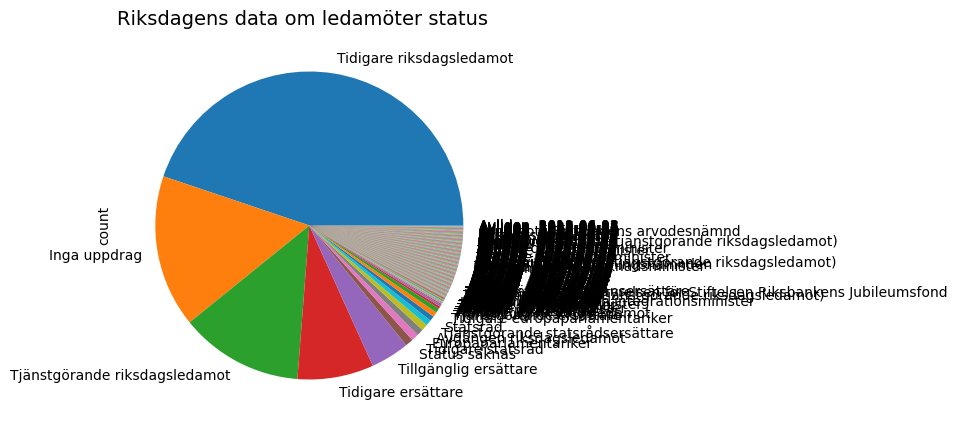

In [18]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = df["status"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.title("Riksdagens data om ledamöter status",fontsize=14,
    loc='left')
plt.show()

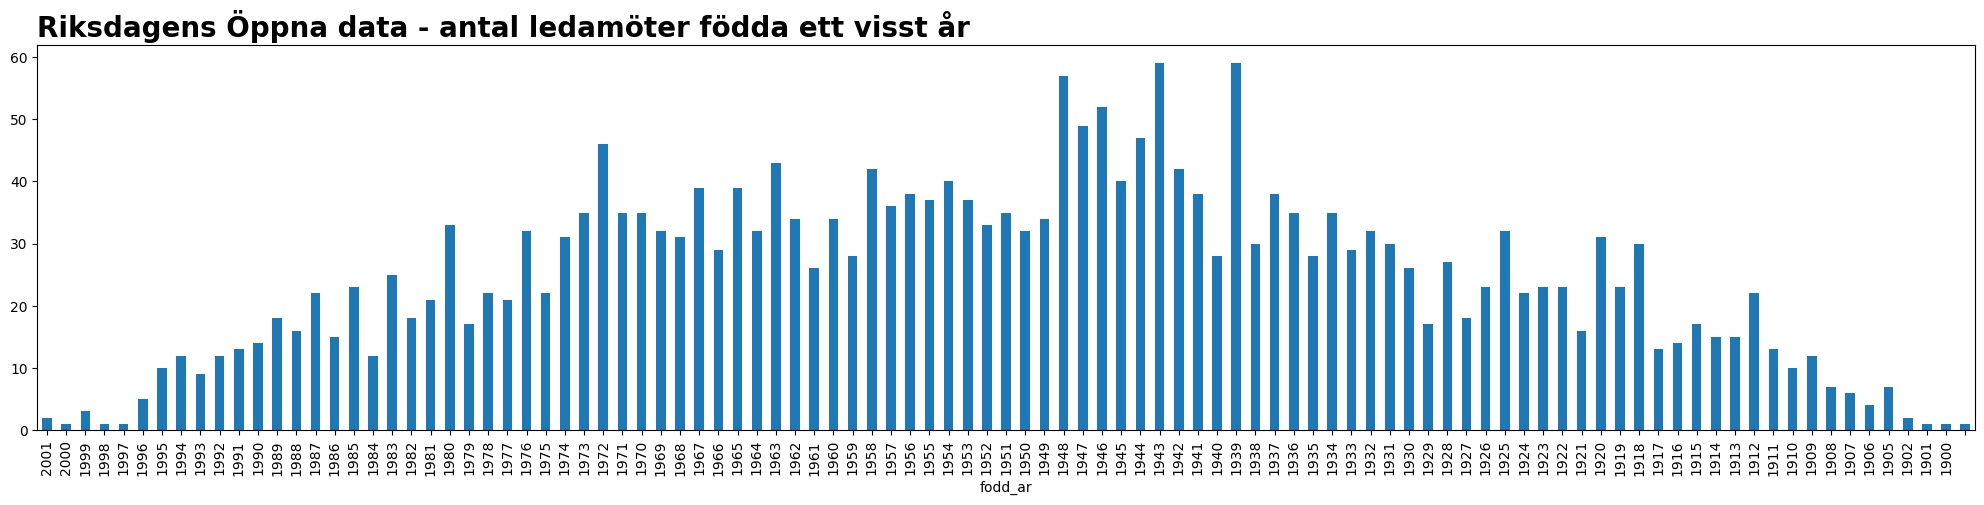

In [19]:
plot = df.fodd_ar.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.title("Riksdagens Öppna data - antal ledamöter födda ett visst år",fontsize=20,
    loc='left',
    fontweight='bold',)
plt.show()

In [20]:
df.iort.value_counts()

iort
               2495
Stockholm         2
Luleå             1
Helsingborg       1
Stockaryd         1
Röstånga          1
Stjärnhov         1
Simrishamn        1
Visby             1
Norrhult          1
Gamleby           1
Bengtsfors        1
Hallsberg         1
Degerhamn         1
Gislaved          1
Skellefteå        1
Göteborg          1
Name: count, dtype: int64

### Compare WD - P8388 = Riksdagen person GUID

In [21]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID  WHERE {
?item wdt:P8388 ?riksdagenGUID
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP8388 = get_sparql_dataframe(endpoint_url, queryP8388)
WDP8388["Source"] = "PropertyP8388" 

In [22]:
WDP8388.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     2560 non-null   object
 1   riksdagenGUID  2560 non-null   object
 2   Source         2560 non-null   object
dtypes: object(3)
memory usage: 60.1+ KB


In [23]:
WDP8388.sample(10)

,WikidataID,riksdagenGUID,Source
364,Q1606431,4dedb39d-706b-46aa-bcce-2e414eb8d289,PropertyP8388
1502,Q4989135,109e9925-a396-4d2f-83ad-123b59ed6a60,PropertyP8388
65,Q4938501,d7c31bf3-83e4-11d4-ae60-0050040c9b55,PropertyP8388
789,Q4939376,a6d52f43-23d5-47c8-84c9-bf7fdc89734a,PropertyP8388
313,Q96309435,e62730fb-adf2-4fc8-a4c2-1ad1ddcc728d,PropertyP8388
221,Q5956750,04ede91e-1686-429d-8847-fadb72508460,PropertyP8388
1776,Q97971232,f5c4d1a2-689f-4a8b-8e6a-036e2afc66e0,PropertyP8388
1908,Q6063807,d7c31f94-83e4-11d4-ae60-0050040c9b55,PropertyP8388
861,Q4979095,8de9bee4-68fd-4f85-96ab-298e3f5061fe,PropertyP8388
1542,Q4971355,dc364cce-6529-44d4-9641-63811417d6dd,PropertyP8388


### Compare Riksdagen <-> WD 

In [24]:
#WDP1214 <-> df
mergeRiksdagenWD = pd.merge(WDP8388, df,how='outer', left_on='riksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWD.rename(columns={"_merge": "WD_Riksdagen"},inplace = True)
mergeRiksdagenWD['WD_Riksdagen'] = mergeRiksdagenWD['WD_Riksdagen'].str.replace('left_only','WD_only').str.replace('right_only','Riksdagen_only')
mergeRiksdagenWD["WD_Riksdagen"].value_counts()  
mergeRiksdagenWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WikidataID      2560 non-null   object
 1   riksdagenGUID   2560 non-null   object
 2   Source          2560 non-null   object
 3   hangar_guid     2514 non-null   object
 4   sourceid        2514 non-null   object
 5   intressent_id   2514 non-null   object
 6   hangar_id       2514 non-null   object
 7   fodd_ar         2514 non-null   object
 8   kon             2514 non-null   object
 9   efternamn       2514 non-null   object
 10  tilltalsnamn    2514 non-null   object
 11  sorteringsnamn  2514 non-null   object
 12  iort            2514 non-null   object
 13  parti           2514 non-null   object
 14  valkrets        2514 non-null   object
 15  status          2514 non-null   object
 16  person_url_xml  2514 non-null   object
 17  bild_url_80     2514 non-null   object
 18  bild_url

In [25]:
mergeRiksdagenWD["WD_Riksdagen"].value_counts() 

WD_Riksdagen
both       2514
WD_only      46
Name: count, dtype: int64

In [26]:
mergeCheck = mergeRiksdagenWD[['WikidataID', 'riksdagenGUID','Source','sourceid','status','WD_Riksdagen','tilltalsnamn','efternamn','parti','fodd_ar','intressent_id']] 

In [27]:
Riksdagen_only = mergeCheck[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy() 

In [28]:
pd.set_option('display.max_rows', None) 



## Riksdagen_only

In [29]:
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       0 non-null      object
 4   status         0 non-null      object
 5   WD_Riksdagen   0 non-null      object
 6   tilltalsnamn   0 non-null      object
 7   efternamn      0 non-null      object
 8   parti          0 non-null      object
 9   fodd_ar        0 non-null      object
 10  intressent_id  0 non-null      object
dtypes: object(11)
memory usage: 0.0+ bytes


In [30]:
from IPython.display import display, HTML   
Riksdagen_only["Riksdagen"] = "<a href='https://www.riksdagen.se/sv/ledamoter-partier/ledamot/_" + Riksdagen_only['sourceid'].astype(str) + "'>link</a>"
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       0 non-null      object
 4   status         0 non-null      object
 5   WD_Riksdagen   0 non-null      object
 6   tilltalsnamn   0 non-null      object
 7   efternamn      0 non-null      object
 8   parti          0 non-null      object
 9   fodd_ar        0 non-null      object
 10  intressent_id  0 non-null      object
 11  Riksdagen      0 non-null      object
dtypes: object(12)
memory usage: 0.0+ bytes


In [31]:
#Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False])
#HTML(Riksdagen_only[{'tilltalsnamn','efternamn','parti','WikidataID','Riksdagen','fodd_ar','intressent_id'}].to_html(escape=False))
Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False]) 
HTML(Riksdagen_only[['tilltalsnamn', 'efternamn', 'parti', 'WikidataID', 'Riksdagen', 'fodd_ar', 'intressent_id','sourceid','status']].to_html(escape=False))


,tilltalsnamn,efternamn,parti,WikidataID,Riksdagen,fodd_ar,intressent_id,sourceid,status


In [32]:
Riksdagen_only["fodd_ar"].value_counts() 

Series([], Name: count, dtype: int64)

In [33]:
Riksdagen_only["parti"].value_counts() 

Series([], Name: count, dtype: int64)

In [34]:
Riksdagen_only.to_csv("Riksdagen_only.csv")

### Check WD if we have P1214 set but not P8388 GUID

In [35]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP1214 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenID  WHERE {
?item wdt:P1214 ?WDriksdagenID.
minus {?item wdt:P8388 ?riksdagenGUID}
}"""


WDP1214 = get_sparql_dataframe(endpoint_url, queryP1214)
WDP1214["Source"] = "PropertyP1214" 

In [36]:
WDP1214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   WDriksdagenID  0 non-null      object
 2   Source         0 non-null      object
dtypes: object(3)
memory usage: 132.0+ bytes


In [37]:
#Merge WDP1214 with Riksdagen_only
#mergeCheckWDP214[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy()  
mergeRiksdagenWDP214 = pd.merge(WDP1214, df,how='outer', left_on='WDriksdagenID', right_on='intressent_id',indicator=True)   
mergeRiksdagenWDP214.rename(columns={"_merge": "WDP1214_Riksdagen"},inplace = True)
mergeRiksdagenWDP214['WDP1214_Riksdagen'] = mergeRiksdagenWDP214['WDP1214_Riksdagen'].str.replace('left_only','WDP1214_only').str.replace('right_only','Riksdagenintressent_id_only')
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts()  
mergeRiksdagenWDP214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   WikidataID         0 non-null      object
 1   WDriksdagenID      0 non-null      object
 2   Source             0 non-null      object
 3   hangar_guid        2512 non-null   object
 4   sourceid           2512 non-null   object
 5   intressent_id      2512 non-null   object
 6   hangar_id          2512 non-null   object
 7   fodd_ar            2512 non-null   object
 8   kon                2512 non-null   object
 9   efternamn          2512 non-null   object
 10  tilltalsnamn       2512 non-null   object
 11  sorteringsnamn     2512 non-null   object
 12  iort               2512 non-null   object
 13  parti              2512 non-null   object
 14  valkrets           2512 non-null   object
 15  status             2512 non-null   object
 16  person_url_xml     2512 non-null   object


In [38]:
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts() 

WDP1214_Riksdagen
Riksdagenintressent_id_only    2512
Name: count, dtype: int64

In [39]:
Riksdagen_intressent_id_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "both"].copy() 
HTML(Riksdagen_intressent_id_only[['sourceid','tilltalsnamn','efternamn','parti','WikidataID','fodd_ar','intressent_id','WDriksdagenID','WDP1214_Riksdagen']].to_html(escape=False))


,sourceid,tilltalsnamn,efternamn,parti,WikidataID,fodd_ar,intressent_id,WDriksdagenID,WDP1214_Riksdagen


In [40]:
#create file to update Wikidata with GUID 
#This file should be empty
HTML(Riksdagen_intressent_id_only[['WikidataID','sourceid']].to_html(escape=False))


,WikidataID,sourceid


In [41]:
#Maybe should be empty. We need to ask Riksdagen if they delete people,,, if not we have errors in WD or in this Notebook
Riksdagen_intressent_wd_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "WDP1214_only"].copy() 
Riksdagen_intressent_wd_only

,WikidataID,WDriksdagenID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP1214_Riksdagen


## Check WD if we have P8388 GUID set but not old P1214 
* as old documents use P1214 its make sense to have both
* new created records seems to lack P1214 at Riksdagen

In [42]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388miss = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenGUID  WHERE {
?item wdt:P8388 ?WDriksdagenGUID.
minus {?item wdt:P1214 ?riksdagenID}
}"""


WDP8388_miss = get_sparql_dataframe(endpoint_url, queryP8388miss)
WDP8388_miss["Source"] = "Property8388" 

In [43]:
WDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   WikidataID       502 non-null    object
 1   WDriksdagenGUID  502 non-null    object
 2   Source           502 non-null    object
dtypes: object(3)
memory usage: 11.9+ KB


In [44]:
# merge WDP8388_miss WDriksdagenGUID with  
mergeRiksdagenWDP8388_miss = pd.merge(WDP8388_miss, df,how='outer', left_on='WDriksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWDP8388_miss.rename(columns={"_merge": "WDP8388_miss_Riksdagen"},inplace = True)
mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'] = mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'].str.replace('left_only','WDP8388_miss_Riksdagen_only').str.replace('right_only','Riksdagensourceid_only')
mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"].value_counts()  

WDP8388_miss_Riksdagen
Riksdagensourceid_only         2056
both                            456
WDP8388_miss_Riksdagen_only      46
Name: count, dtype: int64

In [45]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              502 non-null    object
 1   WDriksdagenGUID         502 non-null    object
 2   Source                  502 non-null    object
 3   hangar_guid             2512 non-null   object
 4   sourceid                2512 non-null   object
 5   intressent_id           2512 non-null   object
 6   hangar_id               2512 non-null   object
 7   fodd_ar                 2512 non-null   object
 8   kon                     2512 non-null   object
 9   efternamn               2512 non-null   object
 10  tilltalsnamn            2512 non-null   object
 11  sorteringsnamn          2512 non-null   object
 12  iort                    2512 non-null   object
 13  parti                   2512 non-null   object
 14  valkrets                2512 non-null   object
 15  stat

In [46]:
WD_P8388_only = mergeRiksdagenWDP8388_miss[mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"] == "both"].copy() 
# TO DO filter only records with intressent_id ==> those wD records should get P1214
HTML(WD_P8388_only[['WikidataID','intressent_id','sourceid']].to_html(escape=False))
WD_P8388_only

,WikidataID,WDriksdagenGUID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP8388_miss_Riksdagen
0,Q53721,23fda174-e940-4cd1-961f-620307edc6d4,Property8388,23fda174-e940-4cd1-961f-620307edc6d4,23fda174-e940-4cd1-961f-620307edc6d4,23fda174-e940-4cd1-961f-620307edc6d4,5147895,1926,man,Fälldin,Thorbjörn,"Fälldin,Thorbjörn",,C,Västernorrlands län,Inga uppdrag,https://data.riksdagen.se/person/23fda174-e940...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
1,Q53733,85283550-b02f-4483-8490-a70cae639f41,Property8388,85283550-b02f-4483-8490-a70cae639f41,85283550-b02f-4483-8490-a70cae639f41,85283550-b02f-4483-8490-a70cae639f41,5148107,1931,man,Ullsten,Ola,"Ullsten,Ola",,FP,Stockholms kommun,Inga uppdrag,https://data.riksdagen.se/person/85283550-b02f...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
3,Q241035,d40e88ef-cc3b-40b6-80fe-cf6f9e1770fd,Property8388,d40e88ef-cc3b-40b6-80fe-cf6f9e1770fd,d40e88ef-cc3b-40b6-80fe-cf6f9e1770fd,d40e88ef-cc3b-40b6-80fe-cf6f9e1770fd,5148087,1905,man,Nilsson,Torsten,"Nilsson,Torsten",,S,Stockholms kommun,Inga uppdrag,https://data.riksdagen.se/person/d40e88ef-cc3b...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
4,Q376484,7820bd49-2371-4c37-8b2c-9c9d3638fa91,Property8388,7820bd49-2371-4c37-8b2c-9c9d3638fa91,7820bd49-2371-4c37-8b2c-9c9d3638fa91,7820bd49-2371-4c37-8b2c-9c9d3638fa91,5148071,1918,man,Helén,Gunnar,"Helén,Gunnar",,FP,Stockholms kommun,Inga uppdrag,https://data.riksdagen.se/person/7820bd49-2371...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
5,Q406161,69f3cd33-4de8-42bd-adbd-a9d1c6aaecc4,Property8388,69f3cd33-4de8-42bd-adbd-a9d1c6aaecc4,69f3cd33-4de8-42bd-adbd-a9d1c6aaecc4,69f3cd33-4de8-42bd-adbd-a9d1c6aaecc4,5147931,1907,kvinna,Ljungberg,Blenda,"Ljungberg,Blenda",,H - M,Uppsala län,Inga uppdrag,https://data.riksdagen.se/person/69f3cd33-4de8...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
6,Q441891,065f39fa-4676-4202-9dab-6ef265a485d8,Property8388,065f39fa-4676-4202-9dab-6ef265a485d8,065f39fa-4676-4202-9dab-6ef265a485d8,065f39fa-4676-4202-9dab-6ef265a485d8,5148073,1917,man,Hermansson,C-H,"Hermansson,C-H",,K - VPK,Stockholms kommun,Inga uppdrag,https://data.riksdagen.se/person/065f39fa-4676...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
8,Q514209,353e4fc3-6449-4b53-b57c-12a50a08a017,Property8388,353e4fc3-6449-4b53-b57c-12a50a08a017,353e4fc3-6449-4b53-b57c-12a50a08a017,353e4fc3-6449-4b53-b57c-12a50a08a017,5147899,1900,man,Hedlund,Gunnar,"Hedlund,Gunnar",,BF - C,Västernorrlands län,Inga uppdrag,https://data.riksdagen.se/person/353e4fc3-6449...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
10,Q728197,1aa0b995-6623-49ea-9c21-40df28c37656,Property8388,1aa0b995-6623-49ea-9c21-40df28c37656,1aa0b995-6623-49ea-9c21-40df28c37656,1aa0b995-6623-49

In [47]:
WD_P8388_only[WD_P8388_only["kon"] =="kvinna"]

,WikidataID,WDriksdagenGUID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP8388_miss_Riksdagen
5,Q406161,69f3cd33-4de8-42bd-adbd-a9d1c6aaecc4,Property8388,69f3cd33-4de8-42bd-adbd-a9d1c6aaecc4,69f3cd33-4de8-42bd-adbd-a9d1c6aaecc4,69f3cd33-4de8-42bd-adbd-a9d1c6aaecc4,5147931,1907,kvinna,Ljungberg,Blenda,"Ljungberg,Blenda",,H - M,Uppsala län,Inga uppdrag,https://data.riksdagen.se/person/69f3cd33-4de8...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
13,Q1727737,f51f4f7b-9ffd-41dc-883f-60fe19190ec7,Property8388,f51f4f7b-9ffd-41dc-883f-60fe19190ec7,f51f4f7b-9ffd-41dc-883f-60fe19190ec7,f51f4f7b-9ffd-41dc-883f-60fe19190ec7,5148049,1918,kvinna,Andersson,Karin,"Andersson,Karin",,C,Stockholms kommun,Inga uppdrag,https://data.riksdagen.se/person/f51f4f7b-9ffd...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
35,Q4935919,7c6ffd9b-ac58-429b-8496-84e73011ea6a,Property8388,7c6ffd9b-ac58-429b-8496-84e73011ea6a,7c6ffd9b-ac58-429b-8496-84e73011ea6a,7c6ffd9b-ac58-429b-8496-84e73011ea6a,5148253,1908,kvinna,Anderson,Ruth,"Anderson,Ruth",,S,Älvsborgs läns norr,Inga uppdrag,https://data.riksdagen.se/person/7c6ffd9b-ac58...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
36,Q4936057,43c35d2b-50de-4410-bc0e-896d9c776027,Property8388,43c35d2b-50de-4410-bc0e-896d9c776027,43c35d2b-50de-4410-bc0e-896d9c776027,43c35d2b-50de-4410-bc0e-896d9c776027,5148053,1920,kvinna,Anér,Kerstin,"Anér,Kerstin",,FP,Stockholms kommun,Inga uppdrag,https://data.riksdagen.se/person/43c35d2b-50de...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
38,Q4938333,af2d4fe4-c917-44e7-b911-99c82ab64d19,Property8388,af2d4fe4-c917-44e7-b911-99c82ab64d19,af2d4fe4-c917-44e7-b911-99c82ab64d19,af2d4fe4-c917-44e7-b911-99c82ab64d19,5148399,1925,kvinna,Bergander,Lilly,"Bergander,Lilly",,S,Stockholms län,Inga uppdrag,https://data.riksdagen.se/person/af2d4fe4-c917...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
39,Q4938354,7780cfc8-f441-4253-bee8-481e1c3f7c2f,Property8388,7780cfc8-f441-4253-bee8-481e1c3f7c2f,7780cfc8-f441-4253-bee8-481e1c3f7c2f,7780cfc8-f441-4253-bee8-481e1c3f7c2f,5148489,1909,kvinna,Bergegren,Astrid,"Bergegren,Astrid",,S,Östergötlands län,Inga uppdrag,https://data.riksdagen.se/person/7780cfc8-f441...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
40,Q4938512,1971de1e-39bf-4a4c-b64d-3db26e66ac95,Property8388,1971de1e-39bf-4a4c-b64d-3db26e66ac95,1971de1e-39bf-4a4c-b64d-3db26e66ac95,1971de1e-39bf-4a4c-b64d-3db26e66ac95,5148037,1922,kvinna,Berglund,Frida,"Berglund,Frida",,S,Norrbottens län,Inga uppdrag,https://data.riksdagen.se/person/1971de1e-39bf...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,https://data.riksdagen.se/filarkiv/bilder/leda...,,{'uppgift': [{'kod': 'Uppdrag inom riksdag och...,both
41,Q4938662,4aa14adf-03f2-4214-a858-73881f579145,Property8388,4aa14adf-03f2-4214-a858-73881f579145,4aa14adf-03f2-4214-a858-73881f57914

In [48]:
WD_P8388_only["intressent_id"].str

In [49]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              502 non-null    object
 1   WDriksdagenGUID         502 non-null    object
 2   Source                  502 non-null    object
 3   hangar_guid             2512 non-null   object
 4   sourceid                2512 non-null   object
 5   intressent_id           2512 non-null   object
 6   hangar_id               2512 non-null   object
 7   fodd_ar                 2512 non-null   object
 8   kon                     2512 non-null   object
 9   efternamn               2512 non-null   object
 10  tilltalsnamn            2512 non-null   object
 11  sorteringsnamn          2512 non-null   object
 12  iort                    2512 non-null   object
 13  parti                   2512 non-null   object
 14  valkrets                2512 non-null   object
 15  stat

### Wikidata med Sweriks P12192 födda jmf med Riksdagen

In [50]:
queryP12192 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?Sweriks ?birth  WHERE {
?item wdt:P12192 ?Sweriks.
OPTIONAL {?item wdt:P569 ?birth}
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP12192 = get_sparql_dataframe(endpoint_url, queryP12192)
WDP12192["Source"] = "PropertyP12192" 

In [51]:
WDP12192.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WikidataID  6175 non-null   object
 1   Sweriks     6175 non-null   object
 2   birth       6164 non-null   object
 3   Source      6175 non-null   object
dtypes: object(4)
memory usage: 193.1+ KB


In [52]:
WDP12192['birth'] = pd.to_datetime(WDP12192['birth'])
WDP12192['birth_year'] = WDP12192['birth'].dt.year
WDP12192.sample(4)

,WikidataID,Sweriks,birth,Source,birth_year
527,Q18202407,i-KMQSXW9jTy41k8atxRpg8q,1985-06-10 00:00:00+00:00,PropertyP12192,1985.0
2698,Q61103104,i-LjpaL4XhPNoSZ44TkA9j3w,1971-09-16 00:00:00+00:00,PropertyP12192,1971.0
3435,Q6256695,i-55RmS5Pfuux2GvYZfGZhK2,1950-12-19 00:00:00+00:00,PropertyP12192,1950.0
278,Q57168632,i-4Cf95LugnAL9WAJuCVMeo8,1968-10-08 00:00:00+00:00,PropertyP12192,1968.0


In [53]:
WDP12192.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   WikidataID  6175 non-null   object             
 1   Sweriks     6175 non-null   object             
 2   birth       6164 non-null   datetime64[ns, UTC]
 3   Source      6175 non-null   object             
 4   birth_year  6164 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 241.3+ KB


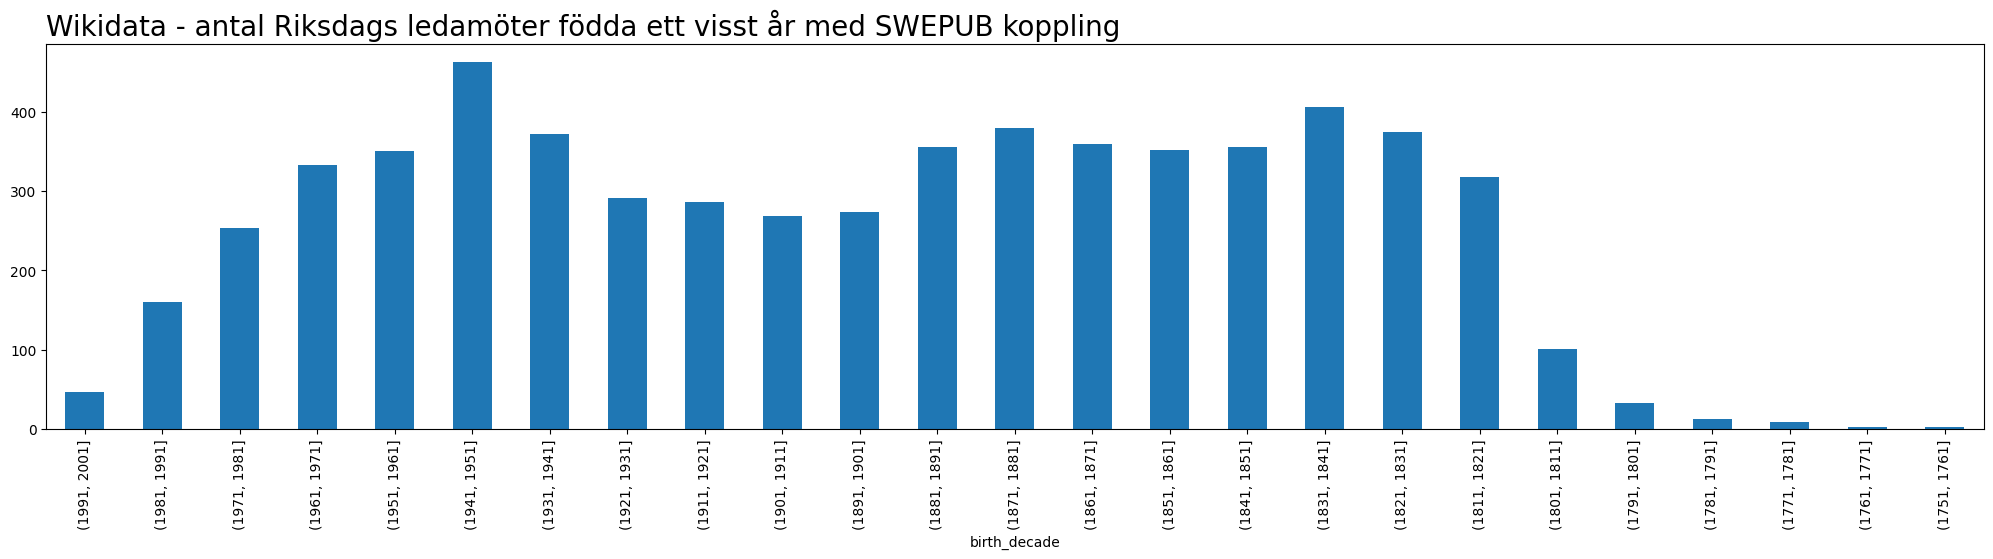

In [54]:
bins = range(int(WDP12192['birth_year'].min()), int(WDP12192['birth_year'].max()) + 10, 10)  
WDP12192['birth_decade'] = pd.cut(WDP12192['birth_year'], bins)
plot = WDP12192.birth_decade.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.title("Wikidata - antal Riksdags ledamöter födda ett visst år med SWEPUB koppling",fontsize=20,
    loc='left')

plt.show()

In [55]:
WDP12192.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   WikidataID    6175 non-null   object             
 1   Sweriks       6175 non-null   object             
 2   birth         6164 non-null   datetime64[ns, UTC]
 3   Source        6175 non-null   object             
 4   birth_year    6164 non-null   float64            
 5   birth_decade  6163 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 248.3+ KB


#### Plotta för varje år

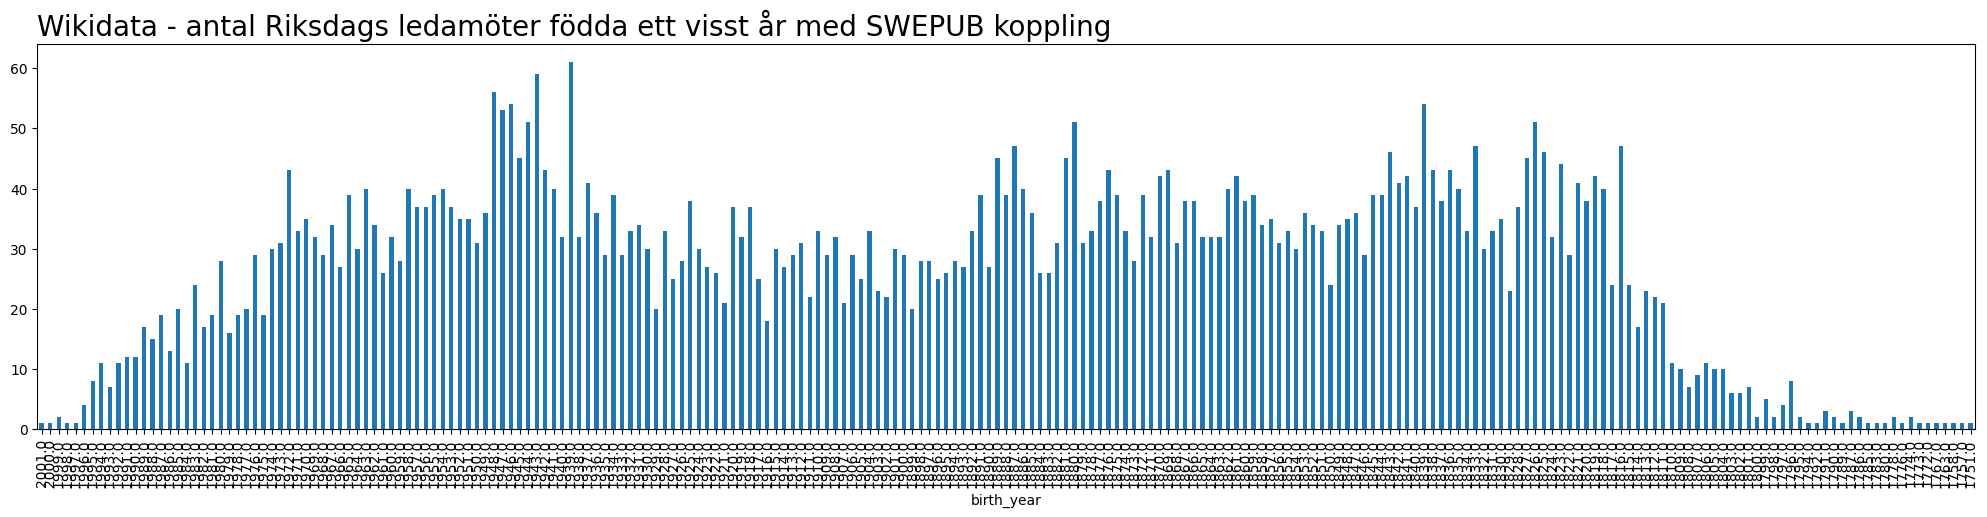

In [56]:
plot = WDP12192.birth_year.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.title("Wikidata - antal Riksdags ledamöter födda ett visst år med SWEPUB koppling",fontsize=20,
    loc='left')

plt.show()

In [57]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2025-01-15 14:00:19.584976
Time elapsed (hh:mm:ss.ms) 0:00:18.506616
